In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Layer, Flatten, Dropout
import matplotlib.pyplot as plt

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
class LinearDense(Layer):
    def __init__(self, units=32, activation=None):
        super(LinearDense, self).__init__()
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        normal_dist = tf.random_normal_initializer()
        zero_dist = tf.zeros_initializer()
        self.w = tf.Variable(name='kernel', initial_value=normal_dist(shape=(input_shape[-1], self.units),
                                                                dtype='float32'),
                       trainable=True)
        self.b = tf.Variable(name='bias', initial_value=zero_dist(shape=(self.units,), dtype='float32'), 
                       trainable=True)

    def call(self, inputs):
        linear = tf.matmul(inputs, self.w) + self.b
        return self.activation(linear)

In [10]:
class QuadraticDense(Layer):
    def __init__(self, units=32, activation=None):
        super(QuadraticDense, self).__init__()
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        normal_dist = tf.random_normal_initializer()
        zero_dist = tf.zeros_initializer()
        self.a = tf.Variable(name='kernel_a', initial_value=normal_dist(shape=(input_shape[-1], self.units), 
                                                                        dtype='float32'),
                            trainable=True)
        self.b = tf.Variable(name='kernel_b', initial_value=normal_dist(shape=(input_shape[-1], self.units),
                                                                       dtype='float32'),
                            trainable=True)
        self.c = tf.Variable(name='bias', initial_value=zero_dist(shape=(self.units,), dtype='float32'),
                            trainable=True)

    def call(self, inputs):
        quadratic = tf.matmul(tf.square(inputs), self.a) + tf.matmul(inputs, self.b) + self.c
        return self.activation(quadratic)

## Trying them out

In [5]:
from keras.datasets import mnist

In [6]:
(x_train, y_train), (x_val, y_val) = mnist.load_data()
x_train = x_train / 255.0
x_val = x_val / 255.0

linear_model = tf.keras.Sequential([
    Flatten(),
    LinearDense(units=128, activation='relu'),
    Dropout(0.2),
    LinearDense(units=10, activation='softmax')
])

linear_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='RMSProp',
                    metrics=['accuracy'])

linear_history = linear_model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3234 - accuracy: 0.9082 - val_loss: 0.1546 - val_accuracy: 0.9557
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1605 - accuracy: 0.9534 - val_loss: 0.1221 - val_accuracy: 0.9652
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1261 - accuracy: 0.9637 - val_loss: 0.0991 - val_accuracy: 0.9714
Epoch 4/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1091 - accuracy: 0.9687 - val_loss: 0.0896 - val_accuracy: 0.9747
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0965 - accuracy: 0.9723 - val_loss: 0.0880 - val_accuracy: 0.9771
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0871 - accuracy: 0.9746 - val_loss: 0.0846 - val_accuracy: 0.9773
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0826 - accuracy: 0.9761 - val_loss: 0.0806 - val_accuracy:

In [11]:
quadratic_model = tf.keras.Sequential([
    Flatten(),
    QuadraticDense(units=128, activation='relu'),
    Dropout(0.2),
    QuadraticDense(units=10, activation='softmax')
])

quadratic_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='RMSProp',
                    metrics=['accuracy'])

quadratic_history = quadratic_model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.9233 - val_loss: 0.1645 - val_accuracy: 0.9527
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1678 - accuracy: 0.9588 - val_loss: 0.1144 - val_accuracy: 0.9704
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1511 - accuracy: 0.9648 - val_loss: 0.1186 - val_accuracy: 0.9703
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1394 - accuracy: 0.9691 - val_loss: 0.1048 - val_accuracy: 0.9759
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1306 - accuracy: 0.9720 - val_loss: 0.1275 - val_accuracy: 0.9723
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1227 - accuracy: 0.9741 - val_loss: 0.1201 - val_accuracy: 0.9760
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1180 - accuracy: 0.9769 - val_loss: 0.1215 - val_accuracy:

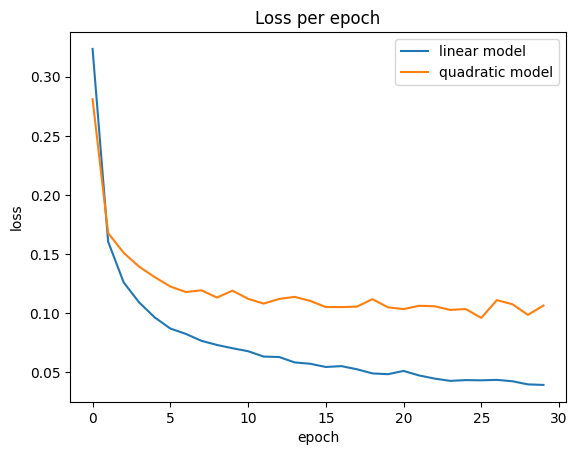

In [14]:
fig, ax = plt.subplots()
ax.plot(linear_history.epoch, linear_history.history['loss'], label='linear model')
ax.plot(quadratic_history.epoch, quadratic_history.history['loss'], label='quadratic model')
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('Loss per epoch');
ax.legend();